In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# Number of rows and columns
print(fruits.shape, '\n')

# Dictionary of labels
lookup_fruit_names = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print(lookup_fruit_names)

(59, 7) 

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [4]:
# Let's build a classifier from this data

# Create train-test split
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 3)
(15, 3)
(44,)
(15,)


,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


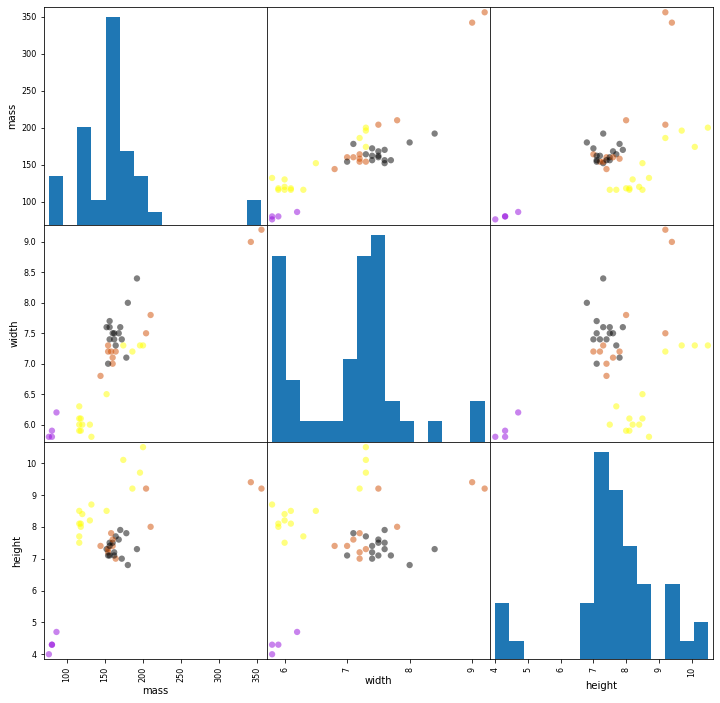

In [6]:
# Let's explore the training set
from matplotlib import cm 

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = '-o', s = 40,
hist_kwds = {'bins': 15}, figsize = (12,12), cmap = cmap)

KeyError: 'color_score'

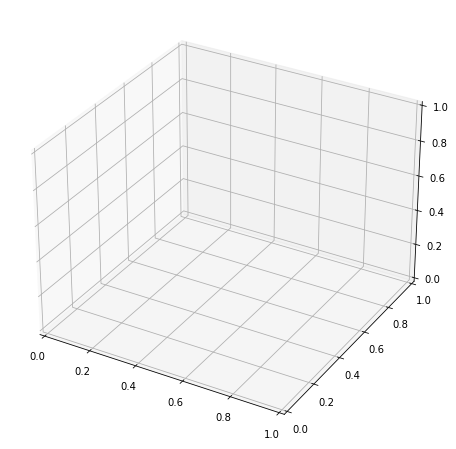

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'],
c = y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

plt.show()

In [10]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
# Train the classifier (fit the estimator) using train data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Estimate accuracy of classifier on future data with test data
knn.score(X_test, y_test)

0.5333333333333333

In [ ]:
# Use trained k-NN classifier model with unseen data
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_names[fruit_prediction[0]]

'mandarin'

In [ ]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_names[fruit_prediction[0]]

'lemon'

c:\Users\kevin\Documents\Zoom\machine-learning\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


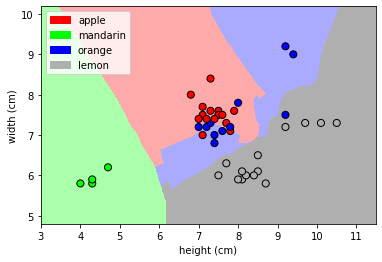

In [8]:
# Plot the decision boundary
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

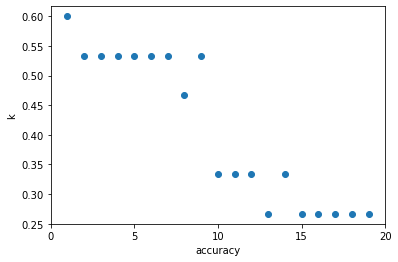

In [11]:
# Sensitivy of the k-NN classifier to our choice of k
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()

plt.scatter(k_range, scores)

plt.ylabel('k')
plt.xlabel('accuracy')
plt.xticks([0,5,10,15,20])

plt.show()